<a href="https://colab.research.google.com/github/asgarali429/machine-learning-projects/blob/main/Classification_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


5


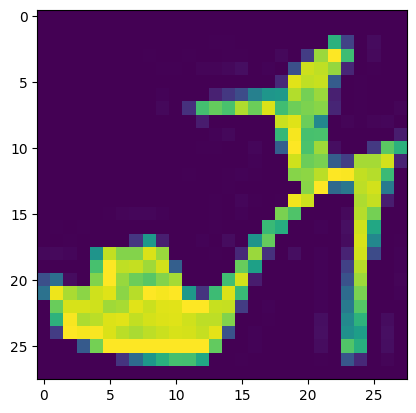

In [5]:
image = xtrain[9]
# print(image)
print(ytrain[9])
plt.imshow(image)


In [6]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7140 - accuracy: 0.7655 - val_loss: 0.5197 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4886 - accuracy: 0.8301 - val_loss: 0.4651 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4440 - accuracy: 0.8454 - val_loss: 0.4231 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4162 - accuracy: 0.8538 - val_loss: 0.4403 - val_accuracy: 0.8358
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3960 - accuracy: 0.8606 - val_loss: 0.4000 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3814 - accuracy: 0.8664 - val_loss: 0.3724 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3673 - accuracy: 0.8705 - val_loss: 0.3858 - val_accura

In [12]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)


1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
classes = np.argmax(predictions, axis=1)
print(classes)


[9 2 1 1 0]


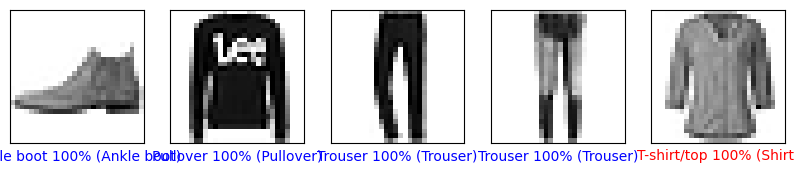

In [19]:
# prompt: how can i plot this above classes which my model predict

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = ytest[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions[i]),
                                         class_names[true_label]),
                                         color=color)
plt.show()
